<a href="https://colab.research.google.com/github/green139/MLSpark/blob/main/ML_System_using_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:-
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Installing findspark
%pip install findspark

In [3]:
# Installing pyspark
%pip install pyspark

In [4]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 2s (113 kB/s)
Reading package lists... Done


In [5]:
#Installing JDK on Windows
!pip install install-jdk

In [6]:
import findspark
findspark.init()

In [7]:
import pyspark.sql.functions as pyf

In [8]:
# Specifying the file path
file_location = "/content/drive/MyDrive/Employee_Compensation (2).csv"

In [9]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("MLwithSpark") \
    .getOrCreate()

# Replace 'file_location' with the path to your CSV file
file_location = "/content/drive/MyDrive/Employee_Compensation (2).csv"

# Reading the dataset into a DataFrame
df = spark.read.option('header', True).csv(file_location)

# Now you can perform operations on your DataFrame 'df'


### 1.1 Display the number of rows and columns in the dataset

In [10]:
# Reading the dataset to a dataframe
df = spark.read.option('header',True).csv(file_location)

In [11]:
print((df.distinct().count(), len(df.columns)))

(291825, 22)


### 1.2 Check the datatype of the variables

In [12]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Organization Group Code: string (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: string (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: string (nullable = true)
 |-- Salaries: string (nullable = true)
 |-- Overtime: string (nullable = true)
 |-- Other Salaries: string (nullable = true)
 |-- Total Salary: string (nullable = true)
 |-- Retirement: string (nullable = true)
 |-- Health/Dental: string (nullable = true)
 |-- Other Benefits: string (nullable = true)
 |-- Total Benefits: string (nullable = true)
 |-- Total Compensation: string (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [13]:
df.show()

+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+---

In [14]:
# Changing datatypes can be tedious when done for multiple columns, instaed, we can read the csv file into another dataframe using inferSchema functionality.
df1 = spark.read.option('header',True).option('inferSchema',True).csv(file_location)



### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [15]:
# Drropping "Year" and "Year Type" columns as they don't add much value to our dataset for prediction
df2 = df1.drop("Year", "Year Type")


df2.printSchema()

df2.summary().show()

# Checking for the columns having -ve values, one at a time
df2.filter(pyf.col("Salaries") < 0).count()

# Handling negative values by just removing the '-' sign so that we don't lost the data
from pyspark.sql.functions import *
df3 = df2.withColumn('Salaries', regexp_replace('Salaries', '-', '').cast("double"))\
      .withColumn('Overtime', regexp_replace('Overtime', '-', '').cast("double"))\
      .withColumn('Other Salaries', regexp_replace('Other Salaries', '-', '').cast("double"))\
      .withColumn('Total Salary', regexp_replace('Total Salary', '-', '').cast("double"))\
      .withColumn('Retirement', regexp_replace('Retirement', '-', '').cast("double"))\
      .withColumn('Health/Dental', regexp_replace('Health/Dental', '-', '').cast("double"))\
      .withColumn('Other Benefits', regexp_replace('Other Benefits', '-', '').cast("double"))\
      .withColumn('Total Benefits', regexp_replace('Total Benefits', '-', '').cast("double"))\
      .withColumn('Total Compensation', regexp_replace('Total Compensation', '-', '').cast("double"))

df3.printSchema()

# Reviewing if the negative values are handled one column at a time
df3.filter(col("Salaries") < 0).count()

root
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)

+-------+-----------------------+--------------------+---------------+-------------------+--------------

0

### 4. Perform Missing Value Analysis

In [16]:
# Checking for null values
from pyspark.sql.functions import isnull, when, count, col
df3.select([count(when(isnull(c), c)).alias(c) for c in df3.columns]).show()

# Checking the maximum occurrence of each column values
df3.groupBy('Union').count().sort(desc("count")).show(truncate=False)

# Checking the dependency of other columns on one particular department
df3.filter("Union == 'SEIU - Staff and Per Diem Nurses, Local 1021' ").show(truncate=False)

# On reviewing, it was found that all these departments are interdependent on each other, so the max occurrence is taken for null values imputation
df3.groupBy('Department','Union Code', 'Union', 'Job Family', 'Job Family Code').count().sort(desc("count")).show(truncate=False)

# Null value imputation using the data found above
df4 = df3.na.fill(791,["Union Code"]).na.fill("SEIU - Staff and Per Diem Nurses, Local 1021",["Union"])\
      .na.fill("2300",["Job Family Code"]).na.fill("Nursing",["Job Family"])
df4.show()

# Checking for null values
from pyspark.sql.functions import isnull, when, count, col
df4.select([count(when(isnull(c), c)).alias(c) for c in df4.columns]).show()

+-----------------------+------------------+---------------+----------+----------+-----+---------------+----------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Organization Group Code|Organization Group|Department Code|Department|Union Code|Union|Job Family Code|Job Family|Job Code|Job|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+-----------------------+------------------+---------------+----------+----------+-----+---------------+----------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|                      0|                 0|              0|         0|        43|   43|             45|        45|       0|  0|                  0|       0|       0|             0|           0

### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

<Axes: xlabel='Organization Group'>

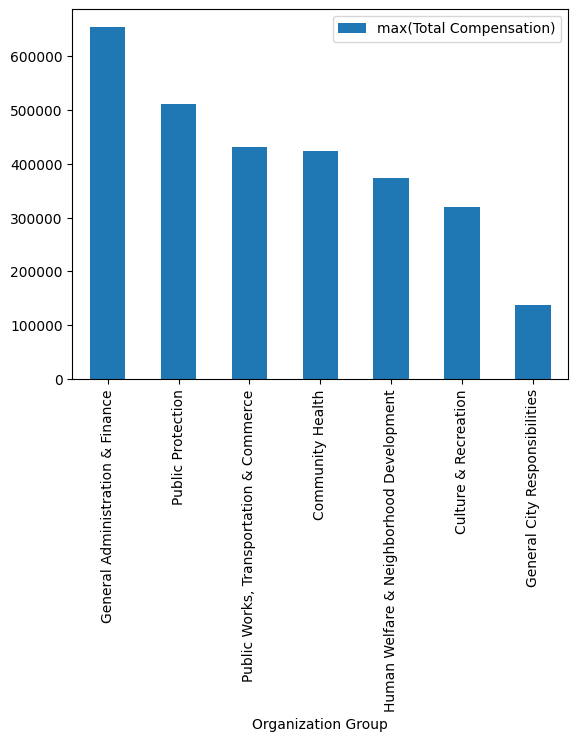

In [17]:
import matplotlib.pyplot as plt

pandasDF  = df4.select("Organization Group","Total Compensation").groupby("Organization Group").agg({"Total Compensation":"max"}).sort(desc("max(Total Compensation)")).toPandas()
pandasDF.plot.bar(x="Organization Group", y="max(Total Compensation)")

#### 5.2. Find top Compensating Jobs. Display using bar plot

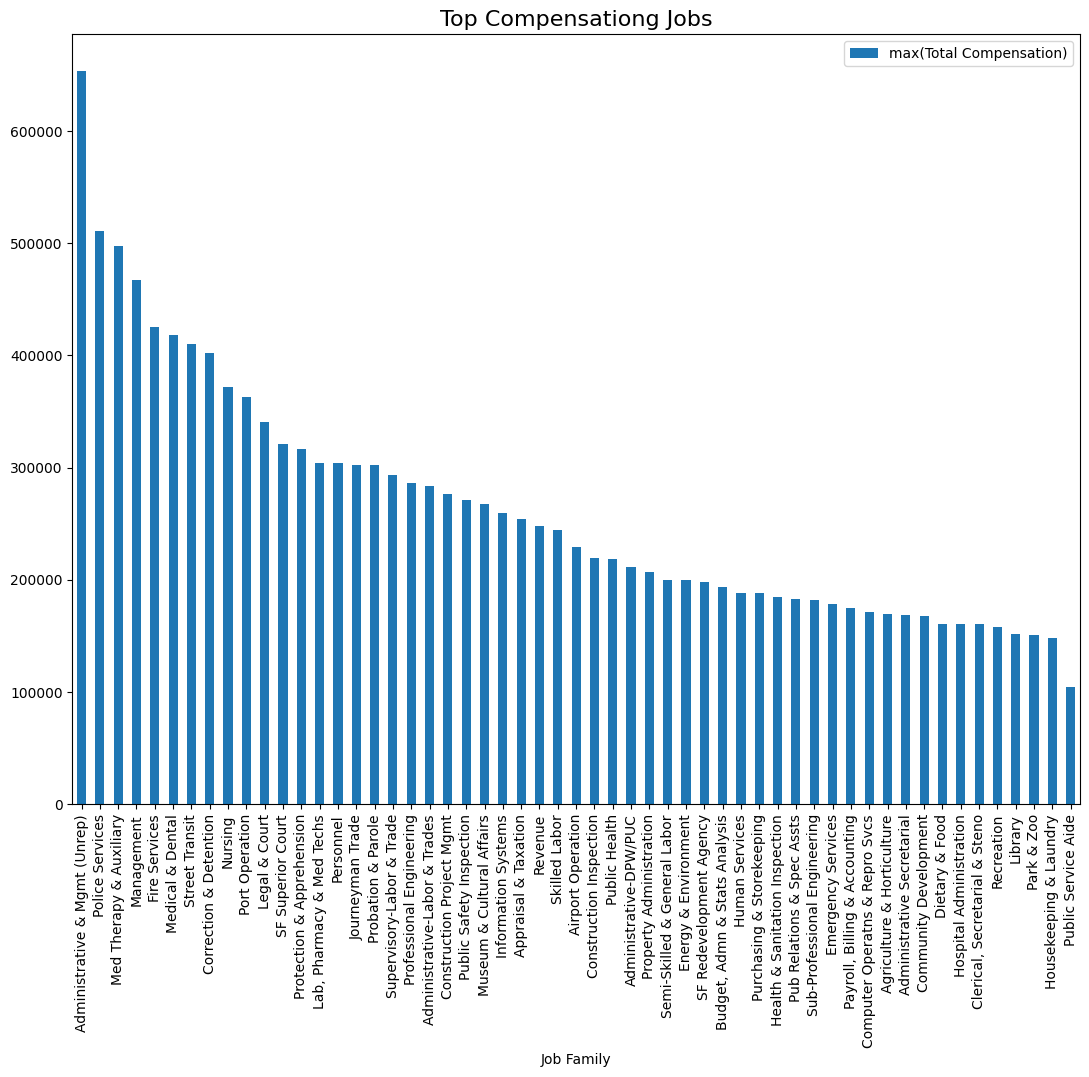

In [18]:
pandasDF_jobs = df4.select("Job Family","Total Compensation").groupby("Job Family").agg({"Total Compensation":"max"}).sort(desc("max(Total Compensation)")).toPandas()
fig, ax = plt.subplots(figsize=(13,10))
pandasDF_jobs.plot.bar(x="Job Family", y="max(Total Compensation)", ax=ax)
ax.set_title('Top Compensationg Jobs', fontsize=16)
plt.show()

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

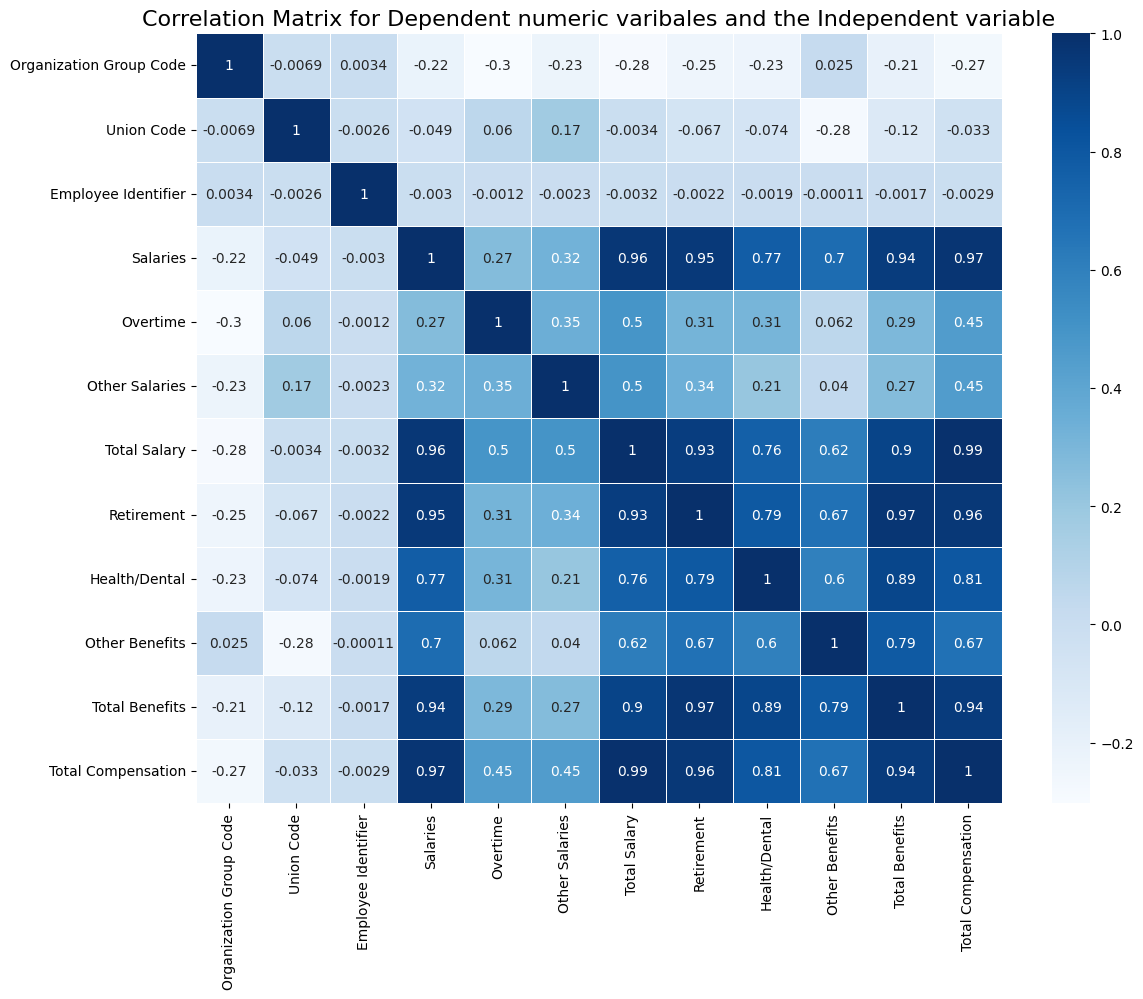

In [19]:
#Correlation heatmap with df4 numerical columns

hmap_columns = [item[0] for item in df4.dtypes if not item[1].startswith('string')]
# Import VectorAssembler from pyspark.ml.feature package and Correlation from pyspark.ml.stat
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Create the VectorAssembler object
assembler = VectorAssembler(inputCols=hmap_columns, outputCol="numerical_features")
assembled_df = assembler.transform(df4)
matrix = Correlation.corr(assembled_df, "numerical_features", 'pearson')
cor_np = matrix.collect()[0][matrix.columns[0]].toArray()

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,10))

sns.heatmap(cor_np, linewidths=.5, cmap='Blues',ax=ax, annot=True,
            xticklabels=hmap_columns, yticklabels=hmap_columns)
ax.set_title('Correlation Matrix for Dependent numeric varibales and the Independent variable', fontsize=16)
plt.show()

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [20]:
df4.printSchema()





root
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = false)
 |-- Job Family Code: string (nullable = false)
 |-- Job Family: string (nullable = false)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



In [21]:
# Extracting columns
columnList = [item[0] for item in df4.dtypes if item[1].startswith('string')]
output_column_list = list(map(lambda x: x+"_index", columnList))
# String indexer
from pyspark.ml.feature import StringIndexer, OneHotEncoder
indexers = StringIndexer(inputCols=columnList,
                         outputCols=output_column_list)
strindexedDF = indexers.fit(df4).transform(df4)
df5 = strindexedDF.select("*")
df5.show()



+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+------------------------+---------------------+----------------+-----------+---------------------+----------------+--------------+---------+
|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_index|Department Code_index|Department_index|Union_index|Job Family Code_index|Job Family_index|Job Code_index|Job_index|
+-----------------------+--------------------+---------------+----------

In [22]:
# Dropping columns post String Indexing
df6 = df5.drop(*columnList)
op_column_list = list(map(lambda x: x+"_vec", columnList))

# One Hot Encoder
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCols= output_column_list ,
                         outputCols=op_column_list)
df7 = encoder.fit(df6).transform(df6)
df7.select("*").show(5, False)

# Dropping columns post One hot Encoding
df8 = df7.drop(*output_column_list)
df8.printSchema()

df8.show()
df8.columns

+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+------------------------+---------------------+----------------+-----------+---------------------+----------------+--------------+---------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+
|Organization Group Code|Union Code|Employee Identifier|Salaries |Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_index|Department Code_index|Department_index|Union_index|Job Family Code_index|Job Family_index|Job Code_index|Job_index|Organization Group_vec|Department Code_vec|Department_vec |Union_vec      |Job Family Code_vec|Job Family_vec |Job Code_vec      |Job_vec           |
+-----------------------+----------+-------------------+---------+

['Organization Group Code',
 'Union Code',
 'Employee Identifier',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation',
 'Organization Group_vec',
 'Department Code_vec',
 'Department_vec',
 'Union_vec',
 'Job Family Code_vec',
 'Job Family_vec',
 'Job Code_vec',
 'Job_vec']

In [23]:
# Vectorizing the independent features
from pyspark.ml.feature import VectorAssembler
columns_list = ['Union Code',
 'Employee Identifier',
 'Salaries',
 'Overtime']

 #Check the Coulumns List'



In [24]:
#featureassembler=VectorAssembler(inputCols="columns_list",outputCol="Numeric_Features")
#df9 = featureassembler.transform(df8)
#df9.show()

# Assuming you have a list of column names in 'columns_list'
#columns_list = ['col1', 'col2', 'col3']


In [25]:

# Initialize VectorAssembler with inputCols as the list of column names
feature_assembler = VectorAssembler(inputCols=columns_list, outputCol="Numeric_Features")

# Transform the DataFrame
df_with_features = feature_assembler.transform(df8)
df_with_features.show()


+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+--------------------+
|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_vec|Department Code_vec| Department_vec|      Union_vec|Job Family Code_vec| Job Family_vec|      Job Code_vec|           Job_vec|    Numeric_Features|
+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+----------------

In [26]:
# Import StandardScaler from pyspark.ml.feature package
#from pyspark.ml.feature import StandardScaler

# Create the StandardScaler object. It only take feature column (dense vector)
#stdscaler = StandardScaler(inputCol="Numeric_Features", outputCol="Scaled_Features")

# Fit the StandardScaler object on the output of the dense vector data and transform
#df10 = stdscaler.fit(df9).transform(df9)
#df10.select("*").show()

#df11 = df10.drop(*columns, "Independent_Features")
#df11.show()
#df11.columns

# Create a list of all the variables that you want to create feature vectors
# These features are then further used for training model
#features_columns = ['Union Code',
# 'Employee Identifier',
# 'Salaries',
# 'Overtime']
# Creating a Vector of all the features together using a VectorAssembler
#from pyspark.ml.feature import VectorAssembler
#assembler = VectorAssembler(inputCols=features_columns, outputCol="independent_features")
#df12 = assembler.transform(df11)
#final_DF = df12.select("independent_features", "Total Compensation")


# Import StandardScaler from pyspark.ml.feature package
from pyspark.ml.feature import StandardScaler

# Previous cell (ipython-input-26-aea79231caf3)
featureassembler=VectorAssembler(inputCols=columns_list,outputCol="Numeric_Features")
df9 = featureassembler.transform(df8) # Assign the result to df9
df9.show()

# Create the StandardScaler object. It only take feature column (dense vector)
# Import StandardScaler from pyspark.ml.feature package
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

# Previous cell (ipython-input-26-aea79231caf3)
featureassembler=VectorAssembler(inputCols=columns_list,outputCol="Numeric_Features")
df9 = featureassembler.transform(df8) # Assign the result to df9
df9.show()

# Create the StandardScaler object. It only take feature column (dense vector)
stdscaler = StandardScaler(inputCol="Numeric_Features", outputCol="Scaled_Features")

# Fit the StandardScaler object on the output of the dense vector data and transform
df10 = stdscaler.fit(df9).transform(df9)
df10.select("*").show()

#df11 = df10.drop(*columns, "Independent_Features")
#df11.show()
#df11.columns



+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+--------------------+
|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_vec|Department Code_vec| Department_vec|      Union_vec|Job Family Code_vec| Job Family_vec|      Job Code_vec|           Job_vec|    Numeric_Features|
+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+----------------

### 6.2 Split the data into train and test set

In [28]:
# Create a list of all the variables that you want to create feature vectors
# These features are then further used for training model

# We spilt the data into 70-30 set
# Training Set - 70% obesevations
# Testing Set - 30% observations

df11 = featureassembler.transform(df8) # Assign the result to df11
df11.show()


features_columns = ['Union Code',
 'Employee Identifier',
 'Salaries',
 'Overtime']
# Creating a Vector of all the features together using a VectorAssembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=features_columns, outputCol="independent_features")
df12 = assembler.transform(df11) # Make sure df11 is defined
final_DF = df12.select("independent_features", "Total Compensation") # Define final_DF here

trainDF, testDF =  final_DF.randomSplit([0.7,0.3], seed = 42) # Define trainDF and testDF

# print the count of observations in each set
print("Observations in training set = ", trainDF.count())
print("Observations in testing set = ", testDF.count())

# ... rest of your code ...

+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+--------------------+
|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_vec|Department Code_vec| Department_vec|      Union_vec|Job Family Code_vec| Job Family_vec|      Job Code_vec|           Job_vec|    Numeric_Features|
+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+----------------

In [29]:
features_columns = ['Union Code',
 'Employee Identifier',
 'Salaries',
 'Overtime']
# Creating a Vector of all the features together using a VectorAssembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=features_columns, outputCol="independent_features")
df12 = assembler.transform(df11) # Make sure df11 is defined
final_DF = df12.select("independent_features", "Total Compensation")
# Uncomment this line to define
final_DFstdscaler = StandardScaler(inputCol="Numeric_Features", outputCol="Scaled_Features")

# Fit the StandardScaler object on the output of the dense vector data and transform
df10 = stdscaler.fit(df9).transform(df9)
df10.select("*").show()

+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+--------------------+--------------------+
|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_vec|Department Code_vec| Department_vec|      Union_vec|Job Family Code_vec| Job Family_vec|      Job Code_vec|           Job_vec|    Numeric_Features|     Scaled_Features|
+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+----------

### 7. Fit Linear Regression model on the data and check its performance

In [30]:

# Linear Regression
from pyspark.ml.regression import LinearRegression

# Create a Linear Regression model object
regressor=LinearRegression(featuresCol='independent_features', labelCol='Total Compensation')
lr_model=regressor.fit(trainDF)
# Prediction
pred_results_lr=lr_model.evaluate(testDF)
pred_results_lr.predictions.show()

# Printing metrics
print("Linear Regression - RMSE: ",pred_results_lr.meanSquaredError)
print("Linear Regression - MAE: ",pred_results_lr.meanAbsoluteError)
print("Linear Regression - R-squared: ",pred_results_lr.r2)






+--------------------+------------------+------------------+
|independent_features|Total Compensation|        prediction|
+--------------------+------------------+------------------+
|[1.0,2.0,22101.23...|          36184.67|35308.448286426545|
|[1.0,68.0,7345.34...|          11212.94|14767.140958963635|
|[1.0,90.0,6013.99...|           9247.49|12913.804112496306|
|[1.0,117.0,5586.3...|           8586.75|12318.431199773222|
|[1.0,122.0,9922.2...|          15125.58|18354.402904743733|
|[1.0,180.0,4405.9...|           6838.61|10675.234230596347|
|[1.0,180.0,7041.4...|          10798.19|14344.091705139566|
|[1.0,255.0,5067.1...|           7791.88|11595.727543410427|
|[1.0,267.0,9639.0...|          14611.98|17960.202321402317|
|[1.0,312.0,1116.8...|           1703.66| 6096.591152214809|
|[1.0,342.0,7299.0...|          11225.23| 14702.68644395976|
|[1.0,392.0,17389....|          27310.28|28749.671096459064|
|[1.0,408.0,9518.5...|          14392.38|17792.436194934857|
|[1.0,491.0,10412....|  

### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [31]:

!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.ml.regression import DecisionTreeRegressor

# Create a SparkSession
spark = SparkSession.builder.appName("DecisionTreeRegression").getOrCreate()



In [32]:
from pyspark.ml.feature import StandardScaler

# Check if 'scaled_features' column already exists and drop it if it does
if 'scaled_features' in trainDF.columns:
    trainDF = trainDF.drop('scaled_features')
if 'scaled_features' in testDF.columns:
    testDF = testDF.drop('scaled_features')

# Create a StandardScaler object
scaler = StandardScaler(inputCol="independent_features", outputCol="scaled_features",
                        withStd=True, withMean=False) # Adjust withMean and withStd as needed

# Fit the StandardScaler to the training data
scaler_model = scaler.fit(trainDF)

# Transform the training data using the fitted scaler model
trainDF = scaler_model.transform(trainDF) # Add this line to scale the features
# Transform the test data using the same fitted scaler model
testDF = scaler_model.transform(testDF) # Scale the test data


# Continue with your existing code:
dt = DecisionTreeRegressor(featuresCol ='scaled_features', labelCol = 'Total Compensation')
dt_model = dt.fit(trainDF)

pred_results_dt=dt_model.transform(testDF)
pred_results_dt.show()

+--------------------+------------------+--------------------+------------------+
|independent_features|Total Compensation|     scaled_features|        prediction|
+--------------------+------------------+--------------------+------------------+
|[1.0,2.0,22101.23...|          36184.67|[0.00299324135638...| 36477.54199778024|
|[1.0,68.0,7345.34...|          11212.94|[0.00299324135638...|11999.539717438558|
|[1.0,90.0,6013.99...|           9247.49|[0.00299324135638...| 4477.386678547185|
|[1.0,117.0,5586.3...|           8586.75|[0.00299324135638...| 4477.386678547185|
|[1.0,122.0,9922.2...|          15125.58|[0.00299324135638...| 16624.58644845873|
|[1.0,180.0,4405.9...|           6838.61|[0.00299324135638...| 4477.386678547185|
|[1.0,180.0,7041.4...|          10798.19|[0.00299324135638...|11999.539717438558|
|[1.0,255.0,5067.1...|           7791.88|[0.00299324135638...| 4477.386678547185|
|[1.0,267.0,9639.0...|          14611.98|[0.00299324135638...| 16624.58644845873|
|[1.0,312.0,1116

In [33]:
from pyspark.ml.evaluation import RegressionEvaluator
rmse=RegressionEvaluator(labelCol="Total Compensation", predictionCol="prediction", metricName="rmse")
rmse=rmse.evaluate(pred_results_dt)

mae=RegressionEvaluator(labelCol="Total Compensation", predictionCol="prediction", metricName="mae")
mae=mae.evaluate(pred_results_dt)

r2=RegressionEvaluator(labelCol="Total Compensation", predictionCol="prediction", metricName="r2")
r2=r2.evaluate(pred_results_dt)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

spark.stop()

RMSE:  12215.794524038258
MAE:  7484.06052959317
R-squared:  0.9673911373843869


### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [34]:
# Start or restart your SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Now try saving your model
dt_model.write().overwrite().save("/FileStore/models/dtmodel")

##### Loading the model